In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [109]:
data =np.random.exponential(scale =2, size=1000)
df =  pd.DataFrame({"Salary" : data})

In [110]:
df.head()

,Salary
0,0.212610
1,0.229982
2,1.064986
3,1.311493
4,2.389746


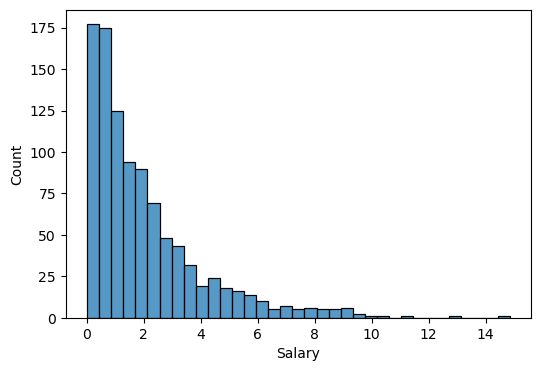

In [111]:
plt.figure(figsize = (6,4))
sns.histplot(df.Salary)
plt.show()

In [112]:
df.Salary.skew()

np.float64(1.8733892342619458)

In [113]:
df["Updated_Salary"] , lambda_val = boxcox(df.Salary)

In [114]:
df.head()

,Salary,Updated_Salary
0,0.212610,-1.275154
1,0.229982,-1.222050
2,1.064986,0.063478
3,1.311493,0.280930
4,2.389746,0.977470


In [115]:
lambda_val

np.float64(0.2593801450839405)

In [116]:
df.Updated_Salary.skew()

np.float64(-0.03815976184681575)

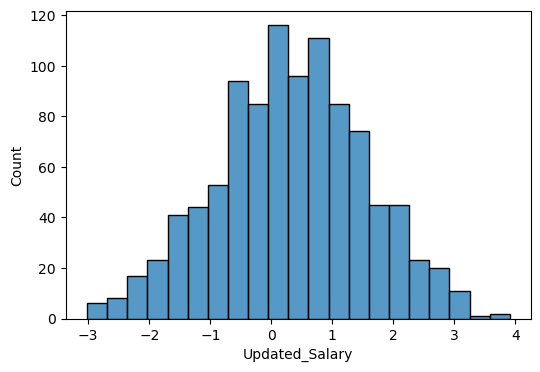

In [117]:
plt.figure(figsize = (6,4))
sns.histplot(df.Updated_Salary)
plt.show()

In [118]:
#leftDistribution
data = np.random.exponential(scale =2, size=1000)
data = 10 - data
df = pd.DataFrame({"Salary2": data})
df.head()

,Salary2
0,9.438452
1,8.333513
2,9.024927
3,9.373161
4,9.596976


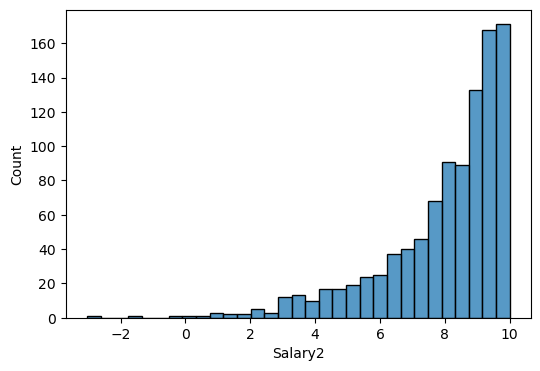

In [119]:
plt.figure(figsize=(6,4))
sns.histplot(df.Salary2)
plt.show()

In [120]:
df.Salary2.skew()

np.float64(-1.628579200002442)

In [121]:
min(df.Salary2) 

-3.034758454427214

In [122]:
df["reflex_salary"] = (df.Salary2.max() - df.Salary2) + 1

In [123]:
df.head()

,Salary2,reflex_salary
0,9.438452,1.560540
1,8.333513,2.665479
2,9.024927,1.974066
3,9.373161,1.625831
4,9.596976,1.402016


In [124]:
max(df.reflex_salary) , min(df.reflex_salary)

(14.033751034067478, 1.0)

In [125]:
df["transformed_salary"] = np.log(df.reflex_salary) 

In [126]:
df.head()

,Salary2,reflex_salary,transformed_salary
0,9.438452,1.560540,0.445032
1,8.333513,2.665479,0.980384
2,9.024927,1.974066,0.680095
3,9.373161,1.625831,0.486019
4,9.596976,1.402016,0.337912


In [127]:
df.transformed_salary.skew()

np.float64(0.4026384678520627)

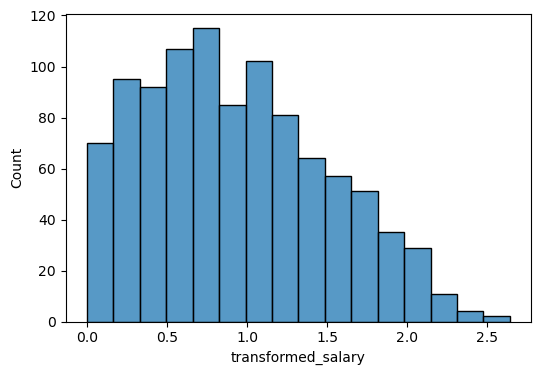

In [128]:
plt.figure(figsize=(6,4))
sns.histplot(df.transformed_salary)
plt.show()

In [142]:
df = pd.read_csv(r"C:\Users\Personal\OneDrive\Desktop\test2.csv")

In [143]:
df

,Unnamed: 0,Name,Age,Department,Salary
0,0,Alice,25.0,HR,50000.0
1,1,Bob,30.0,IT,60000.0
2,2,Charlie,35.0,Finance,70000.0
3,3,David,NaN,IT,62000.0
4,4,Eve,29.0,HR,NaN
5,5,Alice,25.0,HR,50000.0


In [144]:
df.drop("Unnamed: 0", axis =1, inplace = True)

In [145]:
df

,Name,Age,Department,Salary
0,Alice,25.0,HR,50000.0
1,Bob,30.0,IT,60000.0
2,Charlie,35.0,Finance,70000.0
3,David,NaN,IT,62000.0
4,Eve,29.0,HR,NaN
5,Alice,25.0,HR,50000.0


In [146]:
df["Age"] = df["Age"].fillna(value = df["Age"].mean())
df

,Name,Age,Department,Salary
0,Alice,25.0,HR,50000.0
1,Bob,30.0,IT,60000.0
2,Charlie,35.0,Finance,70000.0
3,David,28.8,IT,62000.0
4,Eve,29.0,HR,NaN
5,Alice,25.0,HR,50000.0


In [147]:
df["Salary"] = df["Salary"].fillna(value = df["Salary"].mean())

In [148]:
df

,Name,Age,Department,Salary
0,Alice,25.0,HR,50000.0
1,Bob,30.0,IT,60000.0
2,Charlie,35.0,Finance,70000.0
3,David,28.8,IT,62000.0
4,Eve,29.0,HR,58400.0
5,Alice,25.0,HR,50000.0


In [149]:
#Transform data using LabelEncoder
encoder = LabelEncoder()

In [150]:
df["Transformed_Name"]= encoder.fit_transform(df.Name)

In [151]:
df

,Name,Age,Department,Salary,Transformed_Name
0,Alice,25.0,HR,50000.0,0
1,Bob,30.0,IT,60000.0,1
2,Charlie,35.0,Finance,70000.0,2
3,David,28.8,IT,62000.0,3
4,Eve,29.0,HR,58400.0,4
5,Alice,25.0,HR,50000.0,0


In [155]:
#Transform data using OneHot Encoder
encoder2 = OneHotEncoder(sparse_output = False)

In [157]:
encoded = encoder2.fit_transform(df[["Department"]])

In [158]:
encoder2.get_feature_names_out()

array(['Department_Finance', 'Department_HR', 'Department_IT'],
      dtype=object)

In [163]:
encoded

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [164]:
df

,Name,Age,Department,Salary,Transformed_Name
0,Alice,25.0,HR,50000.0,0
1,Bob,30.0,IT,60000.0,1
2,Charlie,35.0,Finance,70000.0,2
3,David,28.8,IT,62000.0,3
4,Eve,29.0,HR,58400.0,4
5,Alice,25.0,HR,50000.0,0


In [166]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [170]:
scaler = StandardScaler()

In [172]:
df["scaled_salary"] = scaler.fit_transform(df[["Salary"]])

In [173]:
df

,Name,Age,Department,Salary,Transformed_Name,scaled_salary
0,Alice,25.0,HR,50000.0,0,-1.205755
1,Bob,30.0,IT,60000.0,1,0.229668
2,Charlie,35.0,Finance,70000.0,2,1.665091
3,David,28.8,IT,62000.0,3,0.516752
4,Eve,29.0,HR,58400.0,4,0.000000
5,Alice,25.0,HR,50000.0,0,-1.205755


In [174]:
scaler2 = MinMaxScaler()

In [175]:
df["minmax_scaled_salary"] = scaler2.fit_transform(df[["Salary"]])

In [176]:
df

,Name,Age,Department,Salary,Transformed_Name,scaled_salary,minmax_scaled_salary
0,Alice,25.0,HR,50000.0,0,-1.205755,0.00
1,Bob,30.0,IT,60000.0,1,0.229668,0.50
2,Charlie,35.0,Finance,70000.0,2,1.665091,1.00
3,David,28.8,IT,62000.0,3,0.516752,0.60
4,Eve,29.0,HR,58400.0,4,0.000000,0.42
5,Alice,25.0,HR,50000.0,0,-1.205755,0.00


In [218]:
df = pd.read_csv(r"C:\Users\Personal\OneDrive\Desktop\data_visualization.csv")
df

,Unnamed: 0,Student_ID,Name,Gender,Department,Age,Math_Score,Science_Score,Attendance_Percentage,Study_Hours_per_Week
0,0,1,Aarav,Male,CS,21,78,75,85,10
1,1,2,Diya,Female,IT,22,85,88,90,12
2,2,3,Rohan,Male,CS,20,90,85,95,15
3,3,4,Sneha,Female,ECE,21,67,70,80,8
4,4,5,Arjun,Male,IT,23,88,90,92,14
5,5,6,Meera,Female,ECE,22,76,79,88,9
6,6,7,Kiran,Male,CS,21,92,94,96,16
7,7,8,Ananya,Female,IT,20,81,83,89,11
8,8,9,Rahul,Male,ECE,22,74,72,75,7
9,9,10,Isha,Female,CS,23,89,91,93,15


In [219]:
df.head()

,Unnamed: 0,Student_ID,Name,Gender,Department,Age,Math_Score,Science_Score,Attendance_Percentage,Study_Hours_per_Week
0,0,1,Aarav,Male,CS,21,78,75,85,10
1,1,2,Diya,Female,IT,22,85,88,90,12
2,2,3,Rohan,Male,CS,20,90,85,95,15
3,3,4,Sneha,Female,ECE,21,67,70,80,8
4,4,5,Arjun,Male,IT,23,88,90,92,14


In [220]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [221]:
df.head()

,Student_ID,Name,Gender,Department,Age,Math_Score,Science_Score,Attendance_Percentage,Study_Hours_per_Week
0,1,Aarav,Male,CS,21,78,75,85,10
1,2,Diya,Female,IT,22,85,88,90,12
2,3,Rohan,Male,CS,20,90,85,95,15
3,4,Sneha,Female,ECE,21,67,70,80,8
4,5,Arjun,Male,IT,23,88,90,92,14


<Figure size 640x480 with 0 Axes>

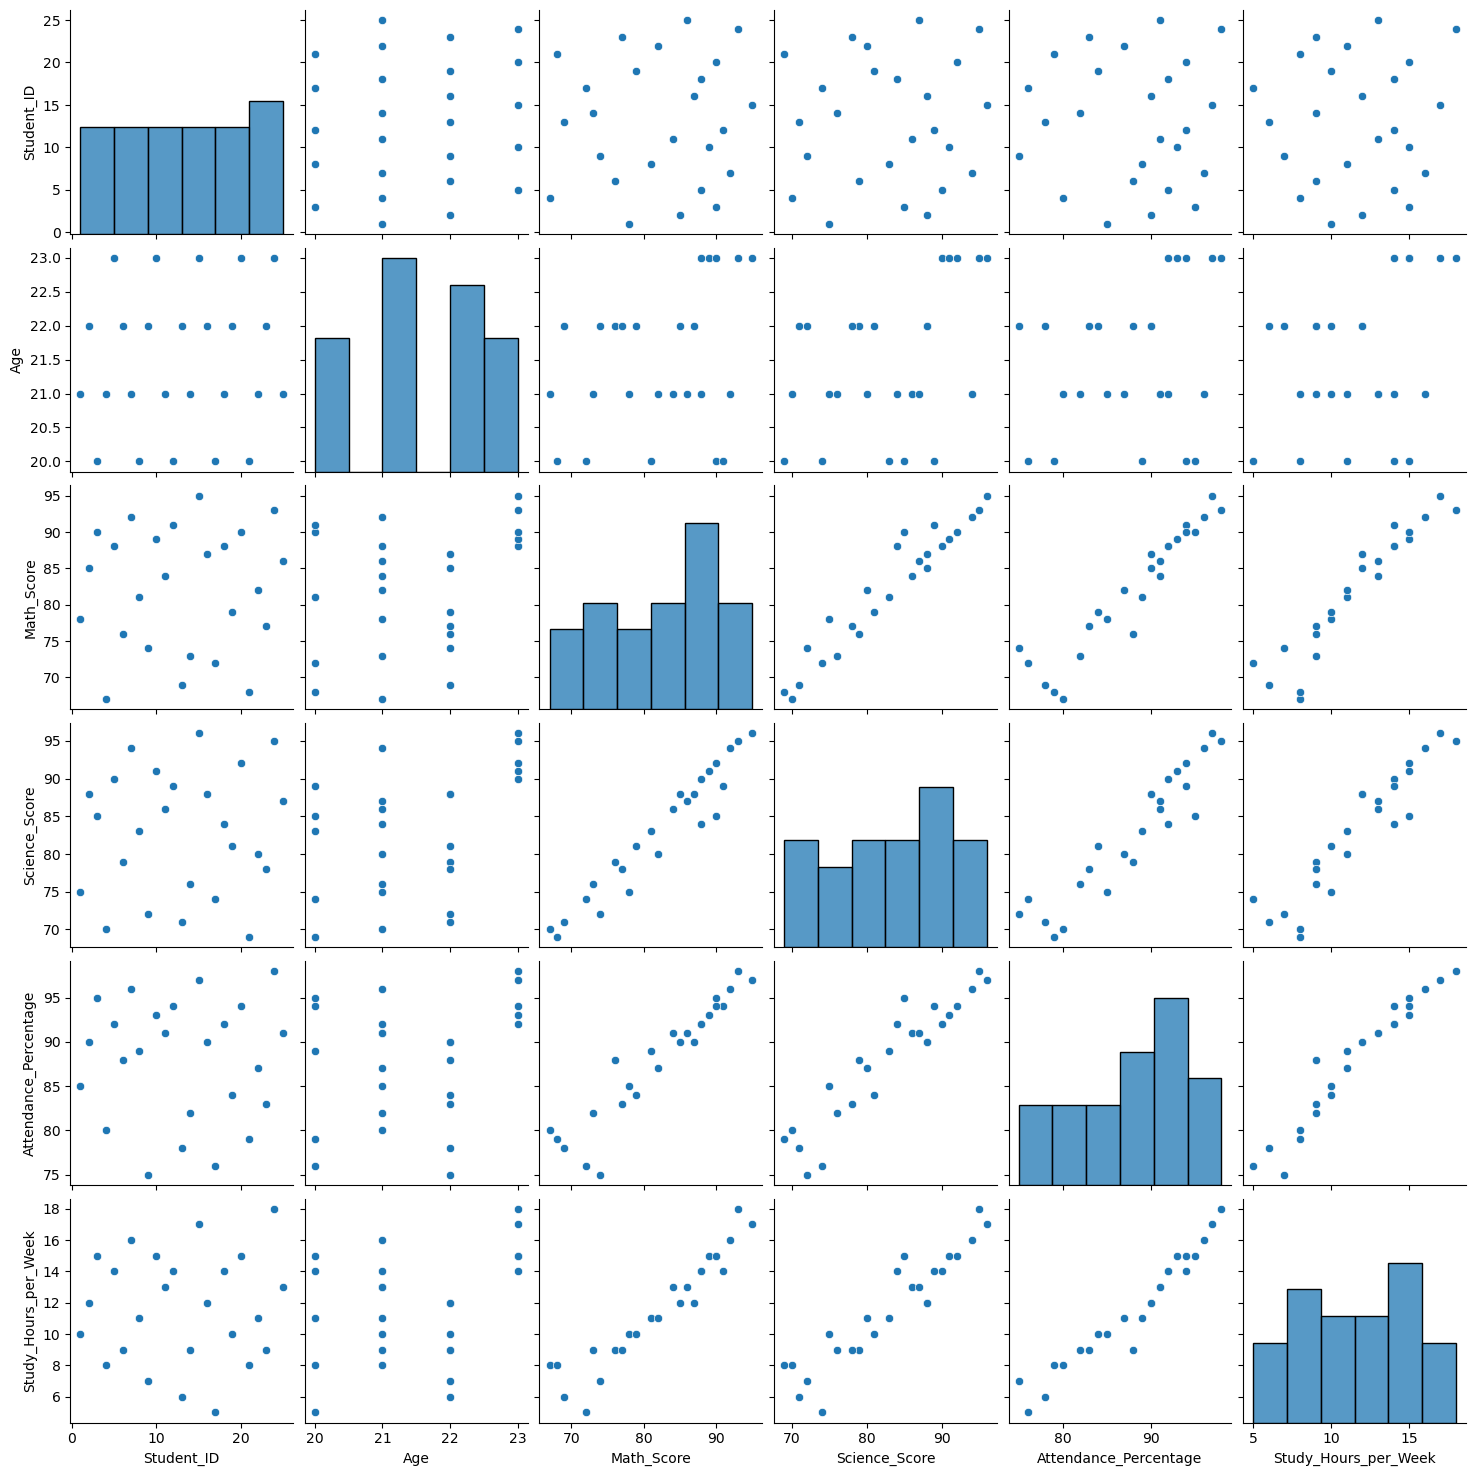

In [222]:
plt.figure()
sns.pairplot(df)
plt.show()

Text(0, 0.5, 'Math Scores')

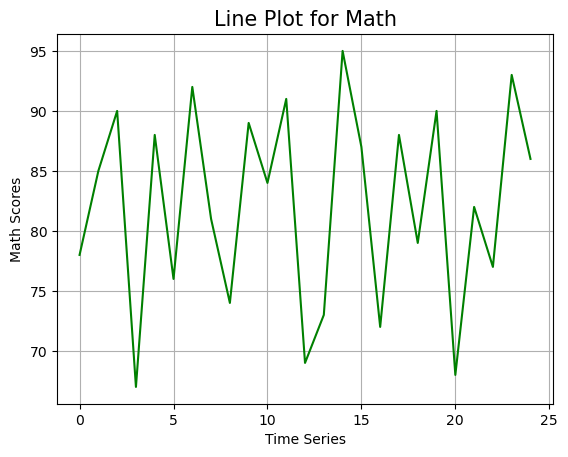

In [228]:
plt.plot(df.Math_Score, color = "green")
plt.grid()
plt.title("Line Plot for Math", fontsize = 15)
plt.xlabel("Time Series")
plt.ylabel("Math Scores")

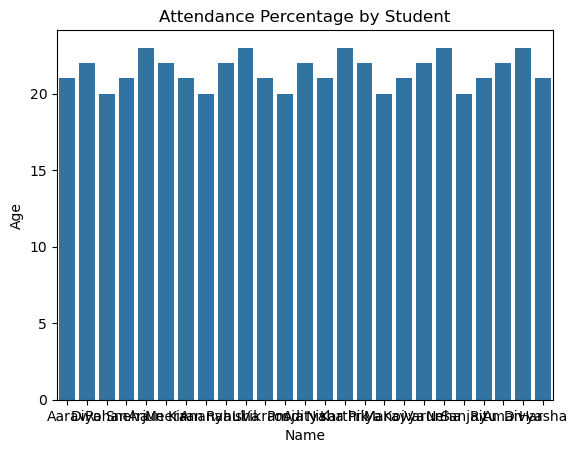

In [247]:
#BarGraph
sns.barplot(x='Name', y='Age', data=df)
plt.title("Attendance Percentage by Student")
plt.show()

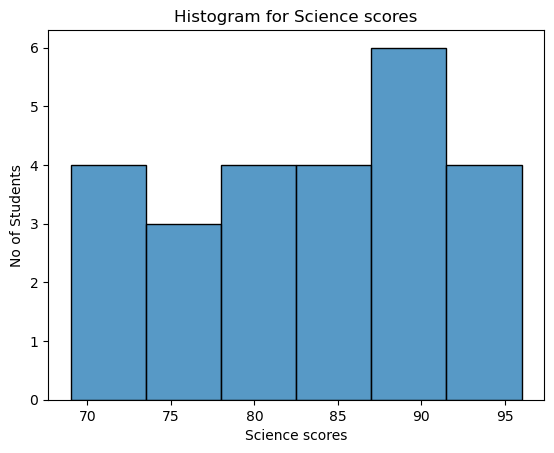

In [236]:
sns.histplot(df["Science_Score"])
plt.title("Histogram for Science scores")
plt.xlabel("Science scores")
plt.ylabel("No of Students")
plt.show()

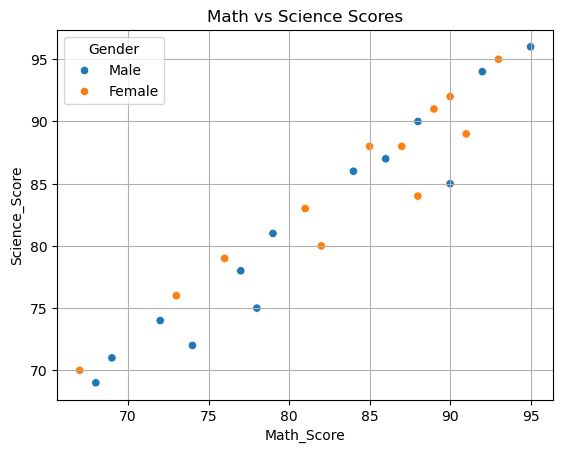

In [270]:
sns.scatterplot(x="Math_Score", y="Science_Score", hue="Gender",data=df)
plt.title("Math vs Science Scores")
plt.grid()


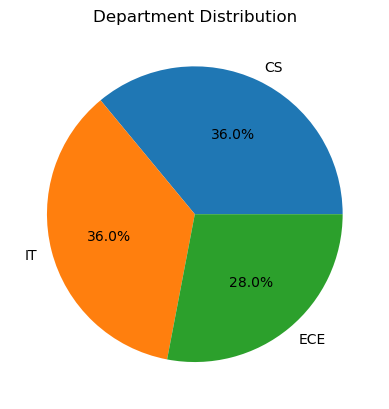

In [292]:
dept_counts = df['Department'].value_counts()
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%')
plt.title("Department Distribution")
plt.show()

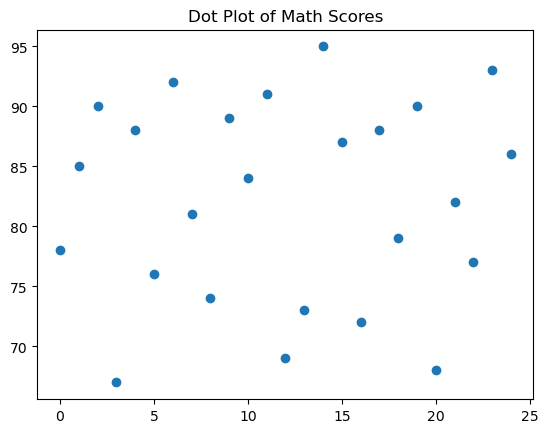

In [290]:
plt.plot(df["Math_Score"], marker='o', linestyle='')

plt.title("Dot Plot of Math Scores")
plt.show()